- 1. 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성.
- 2. F, M feature 기반 군집분석
    - 적정 클러스터 개수 찾기 (Elbow Method)
    - k-Means 알고리즘을 사용하여 적정 군집 수로 군집 생성
    - 군집화 결과 시각화

In [70]:
# 모듈 임포트
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [9]:
kaggle datasets download -d carrie1/ecommerce-data
# !pip install kaggle --upgrade

SyntaxError: invalid syntax (2158410198.py, line 1)

In [12]:
import pandas as pd

# 데이터 로딩
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df=pd.read_csv('data/ecommerce.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/ecommerce.csv'

In [13]:
df.to_csv('ecommerce.csv', index=False)

In [46]:
def remove_oulier(df, col):
    iqr = np.quantile(df[col], 0.75) - np.quantile(df[col], 0.25)
    iqr15 = iqr*1.5
    lower = np.quantile(df, 0.25) - iqr*1.5
    higher = np.quantile(df, 0.75) + iqr*1.5
    df = df[(df[col] <higher)&(df[col]>lower)].reset_index(drop=True)
    return df

In [47]:
bin = df.groupby('CustomerID').size().to_frame().reset_index(drop=False)
df = pd.merge(df, bin)

In [48]:
df['sum'] = df['Quantity']*df['UnitPrice']
su = df.groupby('CustomerID').sum('sum').reset_index(drop=False)
df = pd.merge(df, su[['sum']])b
`

In [68]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,F,M,cor
0,C563600,84880,WHITE WIRE EGG HOLDER,-1,8/18/2011 6:24,7.50,14911.0,EIRE,5903,-7.50,2
1,C555274,23112,PARISIENNE CURIO CABINET,-1,6/1/2011 16:34,7.50,14911.0,EIRE,5903,-7.50,2
2,C569138,23118,PARISIENNE JEWELLERY DRAWER,-1,9/30/2011 14:48,7.50,14911.0,EIRE,5903,-7.50,2
3,C564759,21471,STRAWBERRY RAFFIA FOOD COVER,-2,8/30/2011 10:40,3.75,14911.0,EIRE,5903,-7.50,2
4,C577388,23118,PARISIENNE JEWELLERY DRAWER,-1,11/18/2011 16:58,7.50,14911.0,EIRE,5903,-7.50,2
...,...,...,...,...,...,...,...,...,...,...,...
66,544495,POST,POSTAGE,6,2/21/2011 11:42,28.00,12766.0,Portugal,310,168.00,1
67,543541,POST,POSTAGE,6,2/9/2011 14:44,28.00,12462.0,Spain,72,168.00,1
68,561669,POST,POSTAGE,6,7/28/2011 17:09,28.00,12507.0,Spain,23,168.00,1
69,544578,M,Manual,1,2/21/2011 14:04,320.69,12365.0,Cyprus,23,320.69,1


In [28]:
df['UnitPrice'] = df['UnitPrice'].astype(int)

In [50]:
df.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'F', 'M']

In [58]:
kmeans = KMeans(n_clusters=3)
# X = df['F']
clu = kmeans.fit_predict(df[['F','M']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [64]:
df['cor'] = clu

In [69]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,F,M,cor
0,C563600,84880,WHITE WIRE EGG HOLDER,-1,8/18/2011 6:24,7.50,14911.0,EIRE,5903,-7.50,2
1,C555274,23112,PARISIENNE CURIO CABINET,-1,6/1/2011 16:34,7.50,14911.0,EIRE,5903,-7.50,2
2,C569138,23118,PARISIENNE JEWELLERY DRAWER,-1,9/30/2011 14:48,7.50,14911.0,EIRE,5903,-7.50,2
3,C564759,21471,STRAWBERRY RAFFIA FOOD COVER,-2,8/30/2011 10:40,3.75,14911.0,EIRE,5903,-7.50,2
4,C577388,23118,PARISIENNE JEWELLERY DRAWER,-1,11/18/2011 16:58,7.50,14911.0,EIRE,5903,-7.50,2
...,...,...,...,...,...,...,...,...,...,...,...
66,544495,POST,POSTAGE,6,2/21/2011 11:42,28.00,12766.0,Portugal,310,168.00,1
67,543541,POST,POSTAGE,6,2/9/2011 14:44,28.00,12462.0,Spain,72,168.00,1
68,561669,POST,POSTAGE,6,7/28/2011 17:09,28.00,12507.0,Spain,23,168.00,1
69,544578,M,Manual,1,2/21/2011 14:04,320.69,12365.0,Cyprus,23,320.69,1


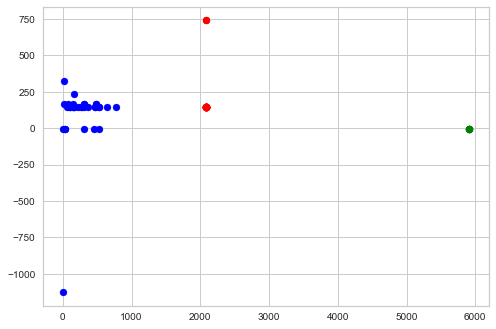

In [67]:
import matplotlib.pyplot as plt

df1 = df[(df['cor']==0)]
df2 = df[(df['cor']==1)]
df3 = df[(df['cor']==2)]
plt.scatter(df1['F'],df1['M'], color = 'red')
plt.scatter(df2['F'],df2['M'], color = 'blue')
plt.scatter(df3['F'],df3['M'], color = 'green')
plt.show()